# Принятие решений в бизнесе

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

 Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача

    Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача
Проанализируйте A/B-тест:

    Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
    Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
    Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
    Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
    Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы

     B к группе A. Сделайте выводы и предположения.
    Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
    Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
    Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
    Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
    Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
    Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
    Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
    Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
    Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

## Приоритизация гипотез.


Открываем файл с данными и изучаем общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math as mth
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()



In [2]:
data= pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 100

In [3]:
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


   ### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.


In [4]:
data['ICE'] =(data['Impact']*data['Confidence'])/ data['Efforts']
data['ICE']=round(data['ICE'],2)
display(data[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


   ###  Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.


In [5]:
data['RICE'] = (data['Reach']*data['Impact']*data['Confidence'])/ data['Efforts']
display(data[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


    Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.


Проведя приоритизацию гипотез применив фреймворк ICE и RICE может отметить,что наивысший приоритет в разных фреймворках разнится, что может быть обусловлено тем, что RICE учитывает также оценку охвата целевой аудитории.   
Наивысшие приоритеы получили следующие гипотезы:
 7 Добавить форму подписки на все основные страницы,
 2 Добавить блоки рекомендаций товаров на сайт,
 0 Добавить два новых канала привлечения трафика,
 6 Показать на главной странице баннеры с актуальной информацией,
 8 Запустить акцию, дающую скидку на товар в день рождения. 

## Анализ A/B-теста

### Проведем предобработку данных

Мы  провели A/B-тест и получили результаты, которые необходимо проанализировать:


In [6]:
orders =pd.read_csv('/datasets/orders.csv')
visitors=pd.read_csv('/datasets/visitors.csv')


In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [10]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [11]:
visitor_duplicated=orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').reset_index()
print(orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count())


group    58
dtype: int64


Из расчетов получаем,что 58пользователей попали в обе группы теста.

Удалим пользователей,которые попали в обе тестируемые группы.

In [12]:
orders = orders[~orders['visitorId'].isin(visitor_duplicated['visitorId'])]


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1016 non-null   int64 
 1   visitorId      1016 non-null   int64 
 2   date           1016 non-null   object
 3   revenue        1016 non-null   int64 
 4   group          1016 non-null   object
dtypes: int64(3), object(2)
memory usage: 47.6+ KB


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
orders.duplicated().sum()

0

In [16]:
visitors.duplicated().sum()

0

Проведем проверку количества групп в А/В-тесте:

In [17]:
orders['group'].nunique()

2

Проверим количество пользователей в каждой группе:
    

In [18]:
test_group = orders.groupby('group', as_index=False).agg({'visitorId': 'nunique'})
test_group



,group,visitorId
0,A,445
1,B,528


Определим сроки проведения А/В-теста:

In [19]:
print(visitors['date'].min())
print(visitors['date'].max())

2019-08-01
2019-08-31


Приведем даты к нужному формату:

In [20]:
visitors['date'] = visitors['date'].map(
lambda x:dt.datetime.strptime(x, '%Y-%m-%d'))
orders['date'] = orders['date'].map(
lambda x:dt.datetime.strptime(x, '%Y-%m-%d'))


### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.


In [21]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 



In [22]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitorId' : 'nunique', 'transactionId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 



In [23]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [24]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head()) 



        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


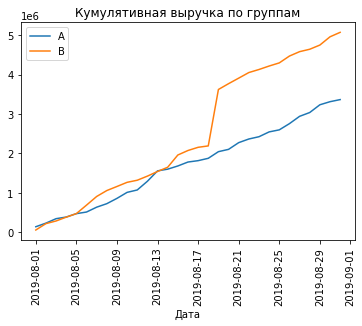

In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Дата')
plt.title('Кумулятивная выручка по группам'); 



В первые дни теста группы идут примерно на одном уровне,однако с 5 августа в размере выручки  группы В происходит резкий скачок и данная группа  начинает лидировать по выручке,сохраняя лидерство сохраняется до конца теста.Возможно в данной группе появились крупные заказы с большим чеком. 

### Построим графики кумулятивного среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:



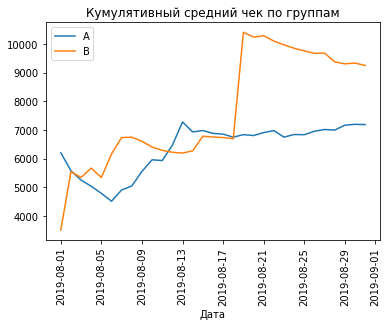

In [26]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.title('Кумулятивный средний чек по группам');



Как видно из графика, первую половину теста средний куммулятивный чек колеблется,но после 17 августа средний чек группы В сильно возрастает и превышает средний чек группы А многократно до конца теста.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.


Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline() (от англ. horizontal line across the axis*, «горизонтальная линия поперек оси»):

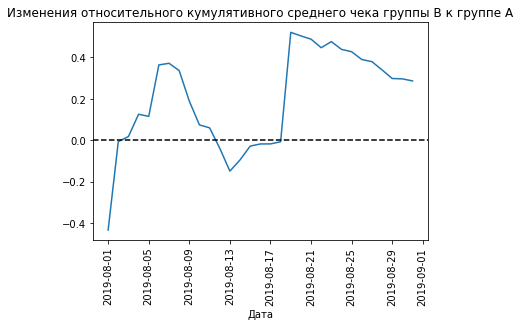

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=90)
plt.xlabel('Дата')
plt.title('Изменения относительного кумулятивного среднего чека группы В к группе А'); 

Видим резкие колебания в течение теста, наличие пиков,возможно обусловленное крупными заказами в определенные даты.

### Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.


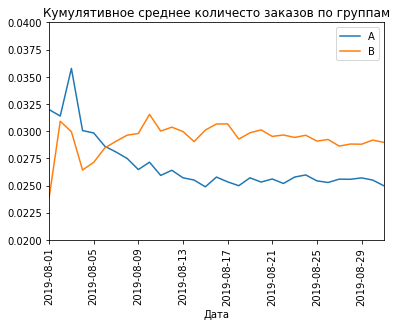

In [28]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Дата')

plt.xticks(rotation=90);

# задаем масштаб осей
plt.axis(xmin=cumulativeData['date'].min(), xmax=cumulativeData['date'].max(), ymin=.020, ymax=0.04)
plt.title('Кумулятивное среднее количесто заказов по группам');


Куммулятивное среднее колеблется в обеих группах, однако с 5 августа куммулятивное среднее группы В значительно превышает куммулятивное среднее группы А.

### Построим график изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

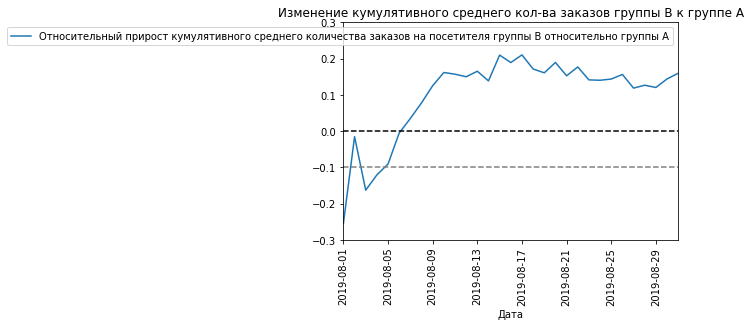

In [29]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation=90);
plt.legend()
plt.xlabel('Дата')
plt.title('Изменение кумулятивного среднего кол-ва заказов группы В к группе А')

plt.axis(xmin=cumulativeData['date'].min(), xmax=cumulativeData['date'].max(), ymin=-0.30, ymax=0.3);



Значительный прирост наблюдается с 5 августа и до конца теста.

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения

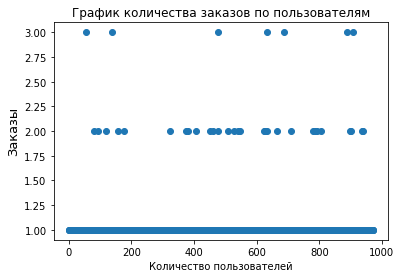

In [30]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)   
ordersByUsers.columns = ['user_id', 'orders']

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.ylabel('Заказы', fontsize=13)
plt.xlabel('Количество пользователей')

plt.show()

Таким образом,можем отметить,что большинство пользователей совершили один заказ,небольшое количество пользователей два и совсем малое количество 3 заказа.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.


In [31]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Из всех пользователей не более 5% совершили больше одного заказа и не более 1% пользователей совершили более 2 заказов.
Количество заказов на пользователя более 2 будем считать аномальными значениями.


### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.


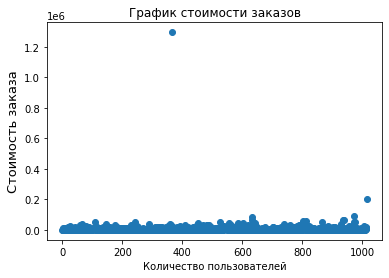

In [32]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказа', fontsize=13)
plt.show()

По графику видно небольшое количество аномальных значений(выбросов).

Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.


In [33]:
print(np.percentile(orders['revenue'], [95,99]))

[26785. 53904.]


 Исходя из расчетов можно сделать вывод,что не более 5% заказов дороже 26785 руб. и не более 1% дороже 53904 руб. Будем считать заказы стоимостью более 54000 руб.аномалиями.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.


Сформулируем гипотезы:
        Н0: Различий в среднем количестве заказов на посетителей по группам нет
        Н1: Различия в среднем количестве заказов на посетителей по группам есть.   

In [34]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 



,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [35]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 



In [36]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders');

In [37]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]; 

In [38]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 



In [39]:
print('p-value:',"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('относительное различие в среднем между группами:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-value: 0.01102
относительное различие в среднем между группами: 0.160


P-value меньше 0,05 следовательно отвергаем нулевую гипотезу,о том что различий в среднем количестве заказов на посетителей между группами нет.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.


Сформулируем гипотезы:
    Н0: Различий в среднем чеке заказа между группами нет.
    Н1: Различия в среднем чеке заказа между группами есть.

In [40]:
print('p-value:',"{0:.5f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительное различие в среднем чеке между группами:',"{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.82949
относительное различие в среднем чеке между группами: 0.287


P-value больше 0.05 не отвергаем нулевую  гипотезу о том,различий в среднем чеке между группами нет.
Однако прирост среднего чека в группе В к группе А равен 28,7%.


Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.


In [41]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 54000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
display(abnormalUsers.shape[0]) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitorId, dtype: int64

16

По расчетам получается 16 аномальных пользователей.

Рассчитаем как отличается статистическая значимость по очищенным данным.
Сформулируем гипотезы:

In [42]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 



In [43]:
print('p-value:',"{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительное различие в среднем количестве заказов между группами:',"{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 



p-value: 0.00702
относительное различие в среднем количестве заказов между группами: 0.189


P-value меньше 0,05 следовательно отвергаем нулевую гипотезу,о том что различий в среднем количестве заказов на посетителей между группами нет.
По рассчетам выше наблюдаем относительное различие в 18,9%.

Далее произведем расчет различия статистической значимости по очищенным данным между группами по среднему чеку:

Сформулируем гипотезы:
    Н0: Различий в среднем чеке заказа между группами нет.
    Н1: Различия в среднем чеке заказа между группами есть.

In [44]:
print(
    'p-value:',"{0:.5f}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'относительное различие в среднем чеке между группами:',"{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 



p-value: 0.78770
относительное различие в среднем чеке между группами: -0.032


P-value больше 0.05 не отвергаем нулевую  гипотезу о том,различий в среднем чеке между группами нет.
Однако  в расчете по "сырым" данным прирост среднего чека в группе В к группе А составлял 28,7%,
а по очищенным данным мы видим убыль в 3%, что может говорить о том что в группе В имелись крупные заказы с очень высоким чеком,которые сильно влияли на результат теста.

## Выводы:


    Проведя анализ результатов А/В-теста можем сделать следующие выводы:
        По сырым данным не выявлено статистической значимости гипотезы о то, что различия в среднем количестве заказов по группам нет.По рассчетам количество заказов в группе В отличается на 16%
        Гипотезу о том, что различия в среднем чеке между группами нет, не отвергаем,т.к. ее p-value>0.05, а по расчетам видим что средний чек в группе В на 28,7% выше чем в группе А.
        По очищенным данным похожая картина: гипотезу об отсутствии различий в среднем количестве заказов между группами отвергаем, по расчетам получает относительное различие в 18,9% в пользу группы В; гипотезу об отсутствии различий в среднем чеке между группами не отвергаем, однако по расчетам обнаруживаем любопытную тенденцию снижения  среднего чека в группе В в сравнении с группой А на 3,2%.Возможно данная ситуация связана с исключением крупных заказов с большими чеками из группы В,которые существенно влияли на средний чек.
        На данном этапе сложно сделать окончательные выводы, так как мы оценивали статистическую значимость только двух параметров: среднего чека и среднего количества заказов между группами. Тем не менее, я склоняюсь к тому, что стоит остановить тест и зафиксировать победу группы B, так как количество заказов в данной группе больше на 18,9%.
        